Iteration 0, Loss: 30.0226
Iteration 100, Loss: 0.5597
Iteration 200, Loss: 0.0415
Iteration 300, Loss: 0.0324
Iteration 400, Loss: 0.0323
Iteration 500, Loss: 0.0323
Iteration 600, Loss: 0.0323
Iteration 700, Loss: 0.0323
Iteration 800, Loss: 0.0323
Iteration 900, Loss: 0.0323
Trained Weights (W): [[0.86077627]]
Trained Bias (b): [[5.41032615]]


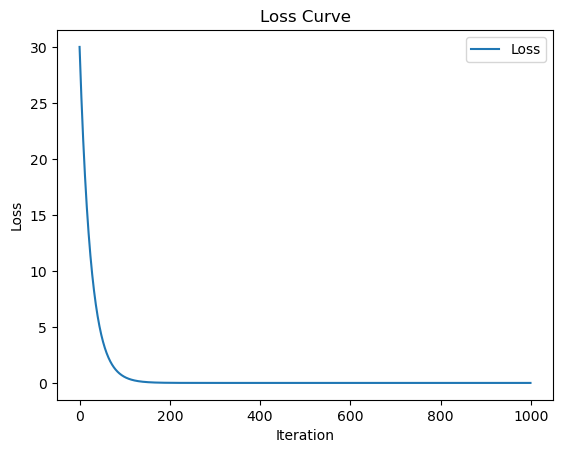

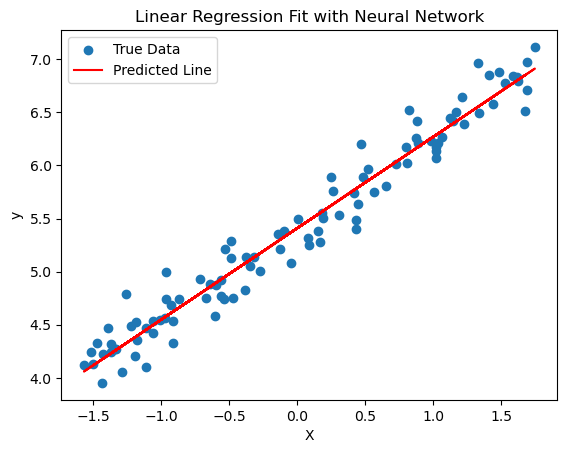

In [1]:
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) * 0.2  # Linear relation with noise

# Normalize input data
X = (X - np.mean(X)) / np.std(X)

# Neural Network Parameters
input_dim = 1  # Single feature
output_dim = 1  # Single target
learning_rate = 0.01
n_iterations = 1000

# Initialize weights and bias
W = np.random.randn(input_dim, output_dim)
b = np.zeros((1, output_dim))

# Define functions for forward and backward pass
def forward(X, W, b):
    """Forward pass: Compute predictions."""
    return np.dot(X, W) + b

def compute_loss(y, y_pred):
    """Mean Squared Error Loss."""
    return np.mean((y - y_pred) ** 2)

def backward(X, y, y_pred):
    """Backward pass: Compute gradients."""
    m = len(y)
    dW = -(2 / m) * np.dot(X.T, (y - y_pred))
    db = -(2 / m) * np.sum(y - y_pred, axis=0, keepdims=True)
    return dW, db

# Training loop
loss_history = []
for iteration in range(n_iterations):
    # Forward pass
    y_pred = forward(X, W, b)
    
    # Compute loss
    loss = compute_loss(y, y_pred)
    loss_history.append(loss)
    
    # Backward pass
    dW, db = backward(X, y, y_pred)
    
    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # Print progress every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss:.4f}")

# Output final weights and bias
print("Trained Weights (W):", W)
print("Trained Bias (b):", b)

# Plot the loss over iterations
import matplotlib.pyplot as plt
plt.plot(range(n_iterations), loss_history, label="Loss")
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualize predictions
plt.scatter(X, y, label="True Data")
plt.plot(X, forward(X, W, b), color='red', label="Predicted Line")
plt.title("Linear Regression Fit with Neural Network")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
